In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset all'interno di un DataFrame

In [2]:
boston = pd.read_csv("Dataset/BostonHousing.csv")

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Tipo di Dati

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Correlazione dei Dati

In [6]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Correlazione trai Dati in Grafico

In [3]:
import seaborn as sns

<Axes: >

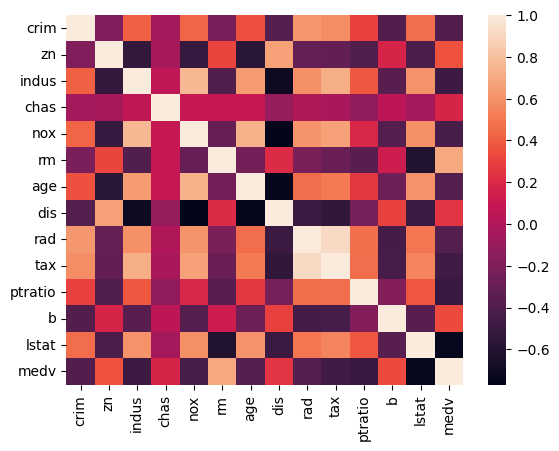

In [10]:
sns.heatmap(boston.corr(), xticklabels=boston.columns, yticklabels=boston.columns)

In [14]:
cols = ["rm","lstat","ptratio","tax","indus","medv"]

<Axes: >

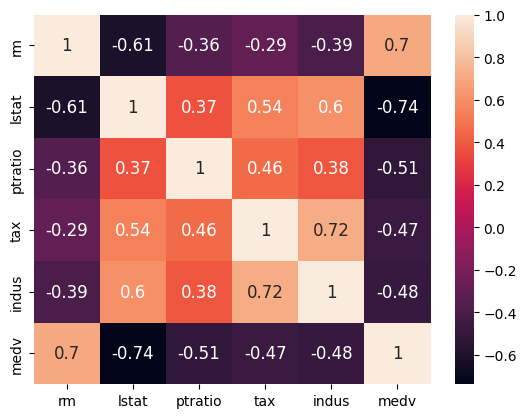

In [15]:
sns.heatmap(boston[cols].corr(), 
           xticklabels=boston[cols].columns,
           yticklabels=boston[cols].columns,
           annot=True,
           annot_kws={'size':12})

# Grafici a Coppie

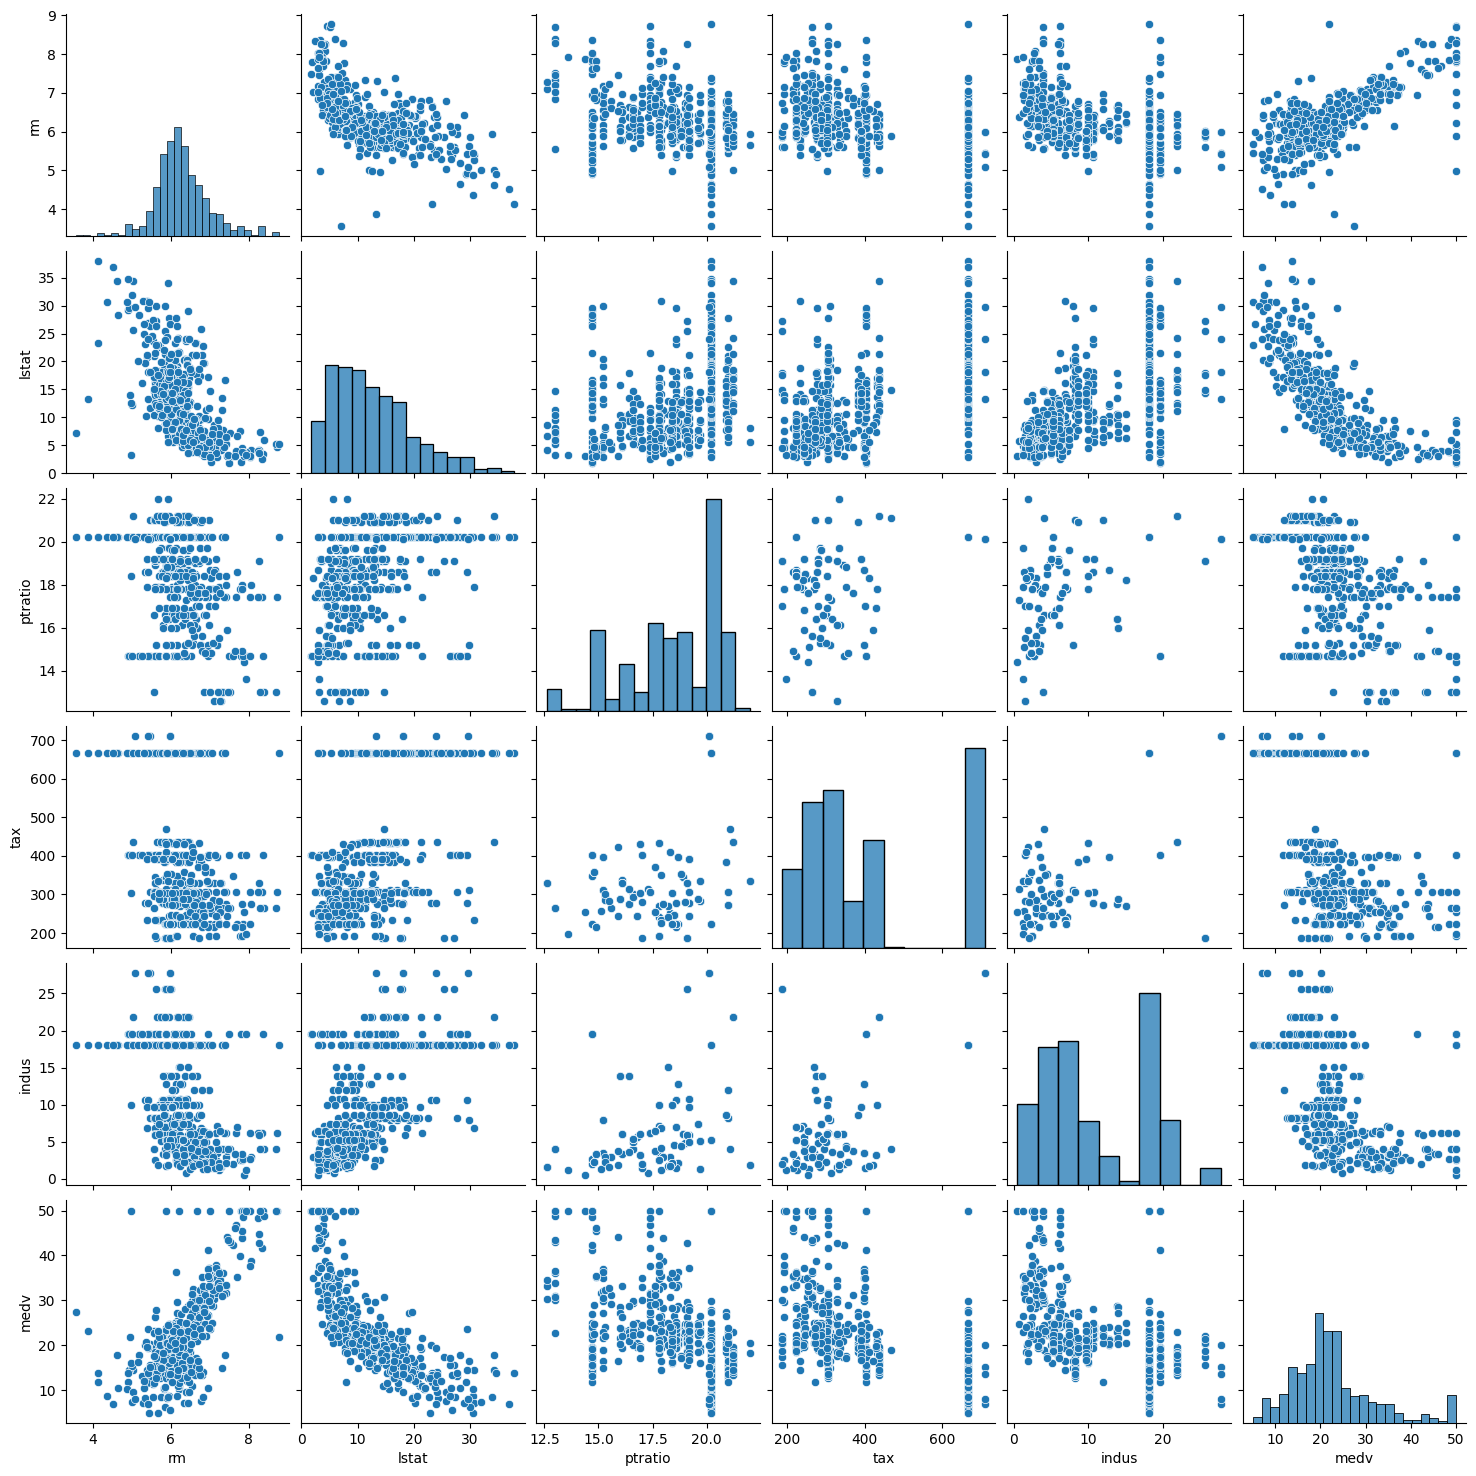

In [16]:
sns.pairplot(boston[cols])

In [4]:
X = boston[["rm","lstat"]].values

In [5]:
Y = boston["medv"].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [7]:
ll = LinearRegression()

In [8]:
ll.fit(X_train, Y_train)

LinearRegression()

In [9]:
Y_pred = ll.predict(X_test)

In [10]:
print("MSE:"+str(mean_squared_error(Y_test, Y_pred)))

MSE:32.72507169281496


In [11]:
print("R2 score:"+str(r2_score(Y_test, Y_pred)))

R2 score:0.6069792285352371


# Regressione su tutti i campi

In [12]:
X = boston.drop("medv", axis=1).values

In [13]:
Y = boston["medv"].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
X_train_std = ss.fit_transform(X_train)

In [18]:
X_test_std = ss.transform(X_test)

In [19]:
ll = LinearRegression()

In [20]:
ll.fit(X_train_std, Y_train)

LinearRegression()

In [21]:
Y_pred = ll.predict(X_test_std)

In [22]:
print("MSE:"+str(mean_squared_error(Y_test, Y_pred)))

MSE:27.195965766883212


In [23]:
print("R2 score:"+str(r2_score(Y_test, Y_pred)))

R2 score:0.6733825506400195


In [24]:
list(zip(boston.columns, ll.coef_))

[('crim', np.float64(-1.0119005895981483)),
 ('zn', np.float64(1.0502802743032686)),
 ('indus', np.float64(0.07920966467269419)),
 ('chas', np.float64(0.6189619959077599)),
 ('nox', np.float64(-1.8736910171630732)),
 ('rm', np.float64(2.7052697851113168)),
 ('age', np.float64(-0.2795726389183002)),
 ('dis', np.float64(-3.097664863869058)),
 ('rad', np.float64(2.096899983672757)),
 ('tax', np.float64(-1.88606339097869)),
 ('ptratio', np.float64(-2.2611046607987704)),
 ('b', np.float64(0.5826430949043788)),
 ('lstat', np.float64(-3.4404983779426273))]